In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(path, header=None)
df.columns =  ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'] 
X = df.drop('species', axis=1).to_numpy()
y = df['species'].to_numpy()
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))

In [5]:
X = X[:, [2,3] ]

In [6]:
X.shape

(150, 2)

## 데이터 분할(훈련용 VS 테스트용)

In [9]:
from sklearn.model_selection import train_test_split


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 1, stratify = y)
#train_size, test_size => 훈련, 테스트 사이즈를 정할 수 있다.
# random_state => 
# stratify => 

In [19]:
X_train.shape

(105, 2)

In [20]:
y_train.shape

(105,)

In [21]:
pd.Series(y_train).value_counts()

0    35
1    35
2    35
dtype: int64

In [22]:
pd.Series(y_test).value_counts()

0    15
1    15
2    15
dtype: int64

- x축 : 꽃잎의 길이(0번째 칼럼) 
- y축 : 꽃잎의 너비(1번째 칼럼)
- 품종별로 다른 색깔로 표시하기 

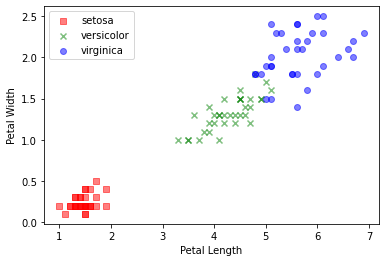

In [27]:
ax = plt.axes()
markers = [ 's', 'x', 'o' ]
colors = [ 'r', 'g', 'b']
labels = ['setosa', 'versicolor', 'virginica']
for i in range(3):
    X_sub = X_train[y_train == i] #품종이 i 인거만 뽑힘 
    ax.scatter(X_sub[:, 0] , X_sub [:, 1], marker = markers[i], c = colors[i], label = labels[i], alpha = 0.5)
    ax.set(xlabel = 'Petal Length', ylabel = 'Petal Width')
    ax.legend()

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
sc = StandardScaler()

In [31]:
sc.fit(X_train)

StandardScaler()

In [33]:
X_train_std  = sc.transform(X_train)

In [35]:
X_test_std = sc.transform(X_test)

In [36]:
X_train_std

array([[-1.33269725, -1.30380366],
       [-1.16537974, -1.30380366],
       [ 0.84243039,  1.44465434],
       [ 1.0655204 ,  1.18289644],
       [-1.44424226, -1.30380366],
       [ 1.0097479 ,  1.57553329],
       [ 1.56747294,  1.18289644],
       [-1.44424226, -1.30380366],
       [ 1.12129291,  0.52850167],
       [ 0.45202286,  0.13586482],
       [-0.27301968, -0.25677204],
       [ 0.06161534,  0.26674377],
       [-1.38846976, -1.30380366],
       [ 0.50779537,  0.00498586],
       [ 0.11738784,  0.13586482],
       [ 0.73088538,  0.92113853],
       [-1.05383474, -1.30380366],
       [-0.16147468, -0.25677204],
       [ 0.06161534,  0.00498586],
       [-1.22115225, -1.30380366],
       [ 0.56356787,  0.79025958],
       [ 1.73479045,  1.44465434],
       [ 0.39625036,  0.39762272],
       [ 0.39625036,  0.13586482],
       [ 0.00584283, -0.12589309],
       [ 1.0097479 ,  1.57553329],
       [ 0.50779537,  0.26674377],
       [ 1.0097479 ,  0.26674377],
       [ 1.12129291,

In [37]:
X_train

array([[1.4, 0.2],
       [1.7, 0.2],
       [5.3, 2.3],
       [5.7, 2.1],
       [1.2, 0.2],
       [5.6, 2.4],
       [6.6, 2.1],
       [1.2, 0.2],
       [5.8, 1.6],
       [4.6, 1.3],
       [3.3, 1. ],
       [3.9, 1.4],
       [1.3, 0.2],
       [4.7, 1.2],
       [4. , 1.3],
       [5.1, 1.9],
       [1.9, 0.2],
       [3.5, 1. ],
       [3.9, 1.2],
       [1.6, 0.2],
       [4.8, 1.8],
       [6.9, 2.3],
       [4.5, 1.5],
       [4.5, 1.3],
       [3.8, 1.1],
       [5.6, 2.4],
       [4.7, 1.4],
       [5.6, 1.4],
       [5.8, 2.2],
       [5.1, 2.4],
       [4.1, 1.3],
       [1.5, 0.4],
       [6.7, 2.2],
       [5. , 1.9],
       [4.8, 1.8],
       [5.6, 2.1],
       [4.2, 1.5],
       [6.7, 2. ],
       [5.5, 1.8],
       [1.6, 0.2],
       [4.9, 1.8],
       [1.4, 0.2],
       [5.1, 1.5],
       [1.9, 0.4],
       [1. , 0.2],
       [4.9, 1.5],
       [1.5, 0.1],
       [1.1, 0.1],
       [5.5, 1.8],
       [4.7, 1.5],
       [1.7, 0.3],
       [3.5, 1. ],
       [4.1,

## 로지스틱 회귀

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logistic = LogisticRegression()

In [41]:
logistic.fit(X_train_std, y_train)

LogisticRegression()

In [42]:
logistic.predict(X_train_std[:3, :])

array([0, 0, 2])

In [53]:
logistic.predict_proba(X_train_std[:3, :]) # 0일 확률 | 1일확률 | 2일 확률

array([[9.59543959e-01, 4.04522758e-02, 3.76537919e-06],
       [9.40769396e-01, 5.92226306e-02, 7.97320867e-06],
       [6.25773725e-05, 6.67508339e-02, 9.33186589e-01]])

In [44]:
y_train[:3]

array([0, 0, 2])

In [45]:
logistic.score(X_train_std, y_train) # 정확도(accuracy)

0.9428571428571428

In [47]:
logistic.score(X_test_std, y_test) # test값에서 잘 나오는 것이 중요! 

0.9777777777777777

In [49]:
# 정오분류표 만들기 

In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
y_pred = logistic.predict(X_test_std) # test data에 대한 예측 분류값
confusion_matrix(y_test, y_pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)